In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
f1=pd.read_csv("/content/sample_data/Mall_Customers.csv")

In [ ]:
f1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
f1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

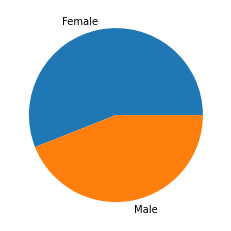

In [ ]:
data1=f1.groupby("Gender",axis=0)
plt.pie(data1.count()["Age"],labels=data1.indices)
plt.show()

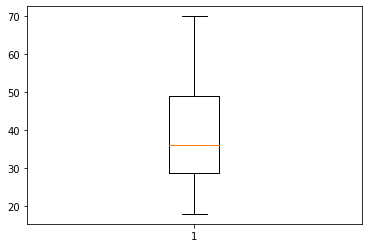

In [ ]:
plt.boxplot(f1["Age"])
plt.show()

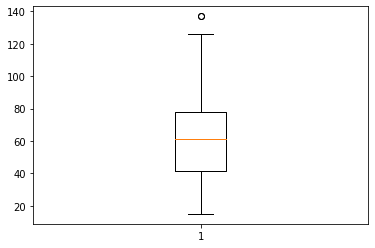

In [ ]:
plt.boxplot(f1["Annual Income (k$)"])
plt.show()

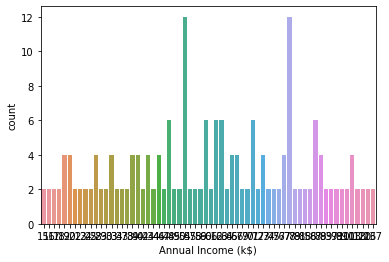

In [ ]:
sns.countplot(x=f1["Annual Income (k$)"])
plt.show()

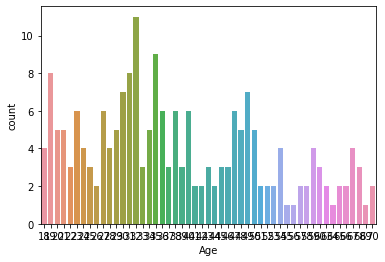

In [ ]:
sns.countplot(x=f1["Age"])
plt.show()

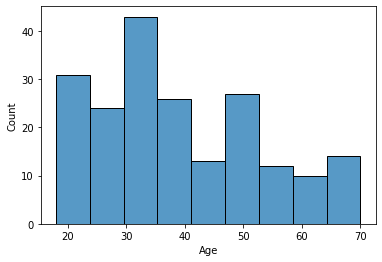

In [ ]:
sns.histplot(f1["Age"])
plt.show()

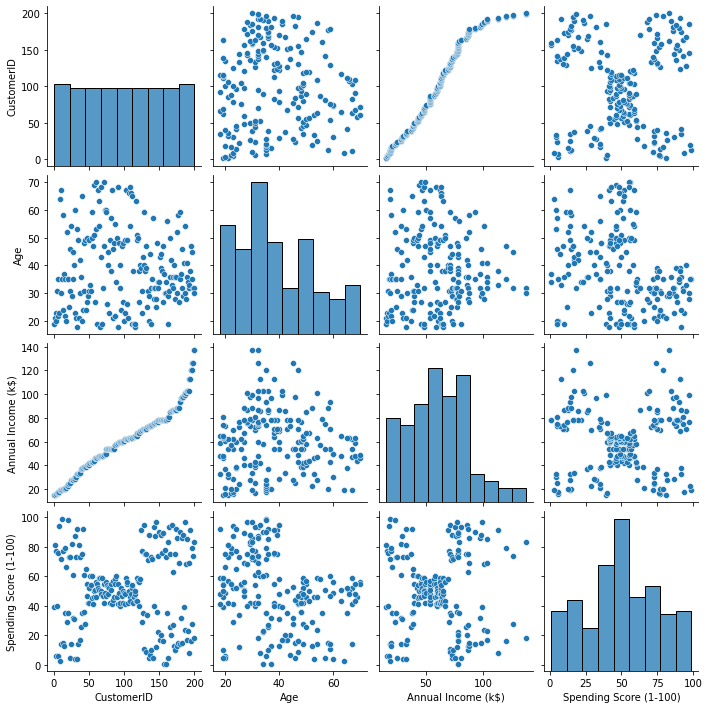

In [ ]:
sns.pairplot(f1)
plt.show()

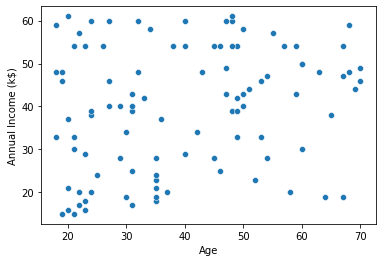

In [ ]:
sns.scatterplot(x=f1.iloc[:100,:]["Age"],y=f1.iloc[:100,:]["Annual Income (k$)"])
plt.show()

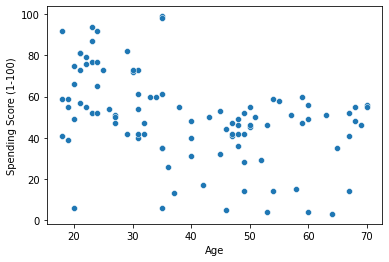

In [ ]:
sns.scatterplot(x=f1.iloc[:100,:]["Age"],y=f1.iloc[:100,:]["Spending Score (1-100)"])
plt.show()

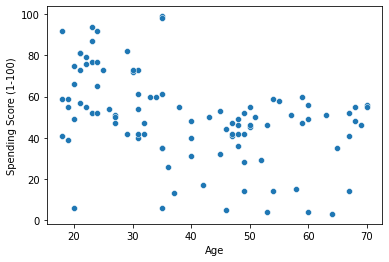

In [ ]:
sns.scatterplot(x=f1.iloc[:100,:]["Age"],y=f1.iloc[:100,:]["Spending Score (1-100)"])
plt.show()

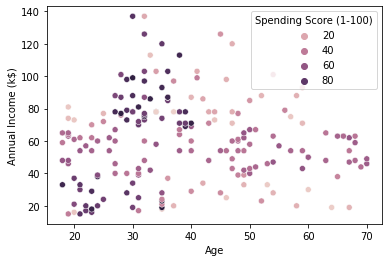

In [ ]:
sns.scatterplot(x=f1.iloc[:200,:]["Age"],y=f1.iloc[:200,:]["Annual Income (k$)"],hue=f1.iloc[:200,:]["Spending Score (1-100)"])
plt.show()

In [ ]:
f1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
f1.mode(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,32.0,54.0,42.0
1,2,NaN,78.0,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
195,196,NaN,NaN,NaN
196,197,NaN,NaN,NaN
197,198,NaN,NaN,NaN
198,199,NaN,NaN,NaN


In [ ]:
f1.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
f1.skew(numeric_only=True)

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [ ]:
f1.kurt(numeric_only=True)

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [ ]:
f1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
f1.skew(numeric_only=True)

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [ ]:
f1.kurt(numeric_only=True)

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [ ]:
f1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

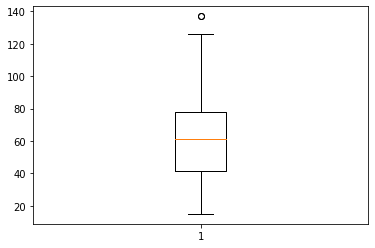

In [ ]:
plt.boxplot(f1["Annual Income (k$)"])
plt.show()

In [ ]:
Q3=np.percentile(f1["Annual Income (k$)"],75,interpolation='midpoint')
Q1=np.percentile(f1["Annual Income (k$)"],25,interpolation='midpoint')
IQR=Q3-Q1
print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)


Q1:  41.0
Q3:  78.0
IQR:  37.0


In [ ]:
upperOutlayers=Q3+1.5*IQR
lowerOutlayers=Q1-1.5*IQR
print(upperOutlayers)
print(lowerOutlayers)


133.5
-14.5


In [ ]:
f1.drop(np.where(f1["Annual Income (k$)"]>=upperOutlayers)[0],inplace=True)
f1.drop(np.where(f1["Annual Income (k$)"]<=lowerOutlayers)[0],inplace=True)


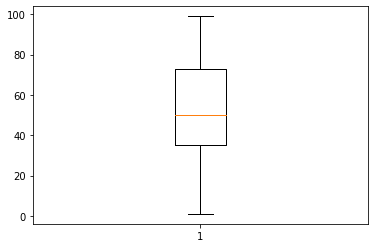

In [ ]:
plt.boxplot(f1["Spending Score (1-100)"]) 
plt.show()

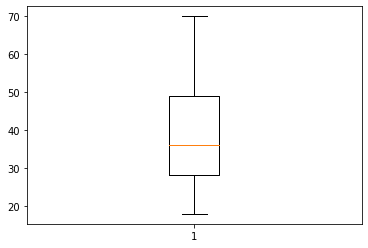

In [ ]:
plt.boxplot(f1["Age"])
plt.show()

7)check for categorical columns and perform encoding



In [ ]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encod=LabelEncoder()
f1['Spending Score (1-100)']=encod.fit_transform(f1['Spending Score (1-100)'])

In [ ]:
print(f1["Spending Score (1-100)"].unique())

[29 66  4 63 30 62 78  1 58 12 82 13 11 65 27 54 23 81 59  3 67 25 51 24
 71  2 76 15 20 61 28 22 53 45 37 32 42 50 44 35 31 40 36 41 46 49 38 39
 43 34 47 48 33 75 79  9  7 26 57 72  5  8 77 10 80 60 17 74 16 14 73  0
 64 68 21 52 70 56 19 55 69 18  6]


In [ ]:
f1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,29
1,2,Male,21,15,66
2,3,Female,20,16,4
3,4,Female,23,16,63
4,5,Female,31,17,30


In [ ]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.4+ KB


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=f1.drop(columns=['Gender'],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,29
1,2,21,15,66
2,3,20,16,4
3,4,23,16,63
4,5,31,17,30


In [ ]:
x.mean()

CustomerID                99.500000
Age                       38.929293
Annual Income (k$)        59.787879
Spending Score (1-100)    40.510101
dtype: float64

In [ ]:
x.std()

CustomerID                57.301832
Age                       14.016852
Annual Income (k$)        25.237259
Spending Score (1-100)    21.416996
dtype: float64

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[901389.0808080807,
 333254.3434343436,
 221911.31360760593,
 171003.61201582343,
 140260.48445207893,
 109191.01502078417,
 92796.6577266962,
 77594.89829778063,
 68627.12795228261,
 60587.13530939454]

In [ ]:
x.mean()

CustomerID                99.500000
Age                       38.929293
Annual Income (k$)        59.787879
Spending Score (1-100)    40.510101
dtype: float64

In [ ]:
x.std()

0.0

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[901389.0808080807,
 333254.3434343436,
 221911.31360760593,
 171003.61201582343,
 140260.48445207893,
 109191.01502078417,
 92796.6577266962,
 77594.89829778063,
 68627.12795228261,
 60587.13530939454]

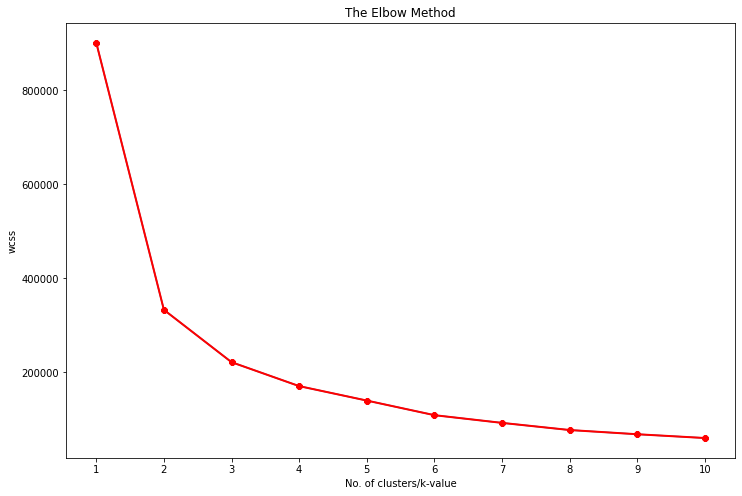

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("No. of clusters/k-value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("wcss")
plt.show()


In [ ]:
kmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmodel.fit_predict(x)

In [ ]:
kmodel.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
      dtype=int32)

In [ ]:
x=x.values

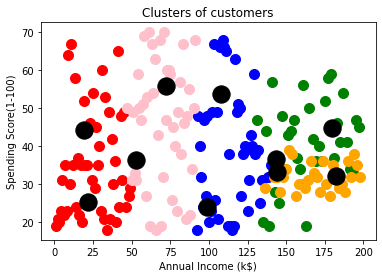

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='pink',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='orange',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()
